In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
plt.rcParams['font.family'] = "MS Gothic"
from import_data import facultyData
import copy
minorityReserveB, minorityReserveDA, M, shiteiDict, fac, bunri, categoryToList=facultyData.main()

In [2]:
improve=pd.read_csv("Result/改善者.csv", header=0, index_col=0)
print(improve)
worse=pd.read_csv("Result/悪化者.csv", header=0, index_col=0)
print(worse)

     l1  l2  l3  s1  s2  s3
0     0   9   0  16  31   0
1     0  10   0  17  32   0
2     0  11   0  17  33   0
3     0  12   0  18  34   0
4     0  13   0  19  35   0
..   ..  ..  ..  ..  ..  ..
995  11  37  14  66  79   1
996  11  37  16  66  80   1
997  12  37  16  69  80   1
998  12  38  17  70  82   2
999  13  38  20  71  86   2

[1000 rows x 6 columns]
     l1  l2  l3  s1  s2  s3
0     0   0   0   0   0   0
1     0   0   0   0   0   0
2     0   0   0   0   0   0
3     0   0   0   0   0   0
4     0   0   0   0   0   0
..   ..  ..  ..  ..  ..  ..
995   0   0   0   0   0   0
996   0   0   0   0   0   0
997   0   0   0   0   0   0
998   0   0   0   0   0   0
999   0   0   0   0   0   0

[1000 rows x 6 columns]


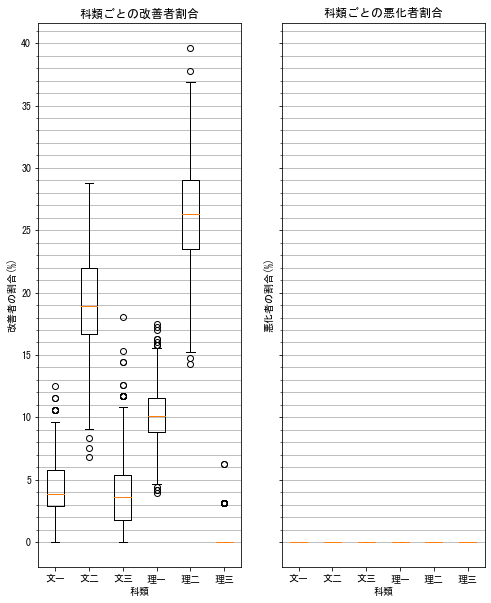

In [43]:
# Jupyter Notebookを利用している方のみ記述してください。
%matplotlib inline 

# 箱ひげ図
fig, ax = plt.subplots(1,2, sharey="row", figsize=(8,10))

#科類のdict
karui_N_dict={"l1":104,"l2":132,"l3":111,"s1":406,"s2":217,"s3":32}

#率を格納するためのlist
rate=[]
#l1~s3の改善者数
for key in karui_N_dict.keys():
    karui_rate=improve[key]/karui_N_dict[key]*100
    rate.append(karui_rate)

ax1=ax[0]


bp = ax1.boxplot(rate) # 複数指定する場合はタプル型で渡します。
ax1.set_xticklabels(["文一", "文二", "文三", "理一", "理二", "理三"])
ax1.set_yticks(np.arange(0, 100, 1), minor=True)

ax1.set_title("科類ごとの改善者割合")
ax1.set_xlabel("科類")
ax1.set_ylabel(r"改善者の割合(%)")
ax1.grid(axis="y", which="both")

#率を格納するためのlist
rate=[]
#l1~s3の改善者数
for key in karui_N_dict.keys():
    karui_rate=worse[key]/karui_N_dict[key]
    rate.append(karui_rate)

ax2=ax[1]


bp = ax2.boxplot(rate) # 複数指定する場合はタプル型で渡します。
ax2.set_xticklabels(["文一", "文二", "文三", "理一", "理二", "理三"])

ax2.set_title("科類ごとの悪化者割合")
ax2.set_xlabel("科類")
ax2.set_ylabel(r"悪化者の割合(%)")
ax2.grid(axis="y", which="both") # 横線ラインを入れることができます。

# 描画
plt.show()
#保存
fig.savefig("image/improve_and_worse.png", facecolor="white")

In [28]:
decrease_leave_rate=pd.read_csv("Result/decrease_leave_rate.csv", header=0, index_col=0)
decrease_leave=pd.read_csv("Result/decrease_leave.csv", header=0, index_col=0)

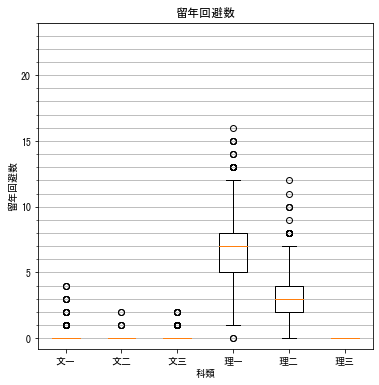

In [39]:
# 箱ひげ図
fig, ax = plt.subplots(1,1, figsize=(6,6))


#率を格納するためのlist
rate=[]
#l1~s3の改善者数
for key in karui_N_dict.keys():
    karui_rate=decrease_leave[key]
    rate.append(karui_rate)

ax1=ax


bp = ax1.boxplot(rate) # 複数指定する場合はタプル型で渡します。
ax1.set_xticklabels(["文一", "文二", "文三", "理一", "理二", "理三"])
ax1.set_yticks(np.arange(0, 25, 1), minor=True)

ax1.set_title("留年回避数")
ax1.set_xlabel("科類")
ax1.set_ylabel("留年回避数")
ax1.grid(axis="y", which="both")


# 描画
plt.show()
#保存
fig.savefig("image/avoidance_leave.png", facecolor="white")

In [41]:
leave_MR=pd.read_csv("Result/leave_MR.csv", header=0, index_col=0)
leave_MQ=pd.read_csv("Result/leave_MQ.csv", header=0, index_col=0)

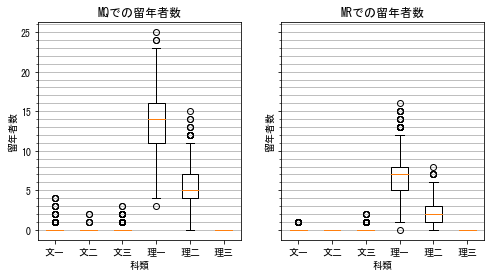

In [45]:
# 箱ひげ図
fig, ax = plt.subplots(1,2, sharey="row", figsize=(8,4))

#科類のdict
karui_N_dict={"l1":104,"l2":132,"l3":111,"s1":406,"s2":217,"s3":32}

#率を格納するためのlist
rate=[]
#l1~s3の改善者数
for key in karui_N_dict.keys():
    karui_rate=leave_MQ[key]
    rate.append(karui_rate)

ax1=ax[0]


bp = ax1.boxplot(rate) # 複数指定する場合はタプル型で渡します。
ax1.set_xticklabels(["文一", "文二", "文三", "理一", "理二", "理三"])
ax1.set_yticks(np.arange(0, 100, 1), minor=True)

ax1.set_title("MQでの留年者数")
ax1.set_xlabel("科類")
ax1.set_ylabel(r"留年者数")
ax1.grid(axis="y", which="both")

#率を格納するためのlist
rate=[]
#l1~s3の改善者数
for key in karui_N_dict.keys():
    karui_rate=leave_MR[key]
    rate.append(karui_rate)

ax2=ax[1]


bp = ax2.boxplot(rate) # 複数指定する場合はタプル型で渡します。
ax2.set_xticklabels(["文一", "文二", "文三", "理一", "理二", "理三"])

ax2.set_title("MRでの留年者数")
ax2.set_xlabel("科類")
ax2.set_ylabel(r"留年者数")
ax2.grid(axis="y", which="both") # 横線ラインを入れることができます。

# 描画
plt.show()
#保存
fig.savefig("image/leave_MQ_MR.png", facecolor="white")

In [40]:
avg_MR=pd.read_csv("Result/新制度での生徒の進学平均点.csv", header=0, index_col=0)
sum_row=[]
for f in fac:
    sum_row.append(avg_MR[f].sum()/1000)
avg_MR.loc["1000回平均"]=sum_row
sample_mean_list_MR=sum_row[:]

avg_MQ=pd.read_csv("Result/旧制度での生徒の進学平均点.csv", header=0, index_col=0)
sum_row=[]
for f in fac:
    sum_row.append(avg_MQ[f].mean())
avg_MQ.loc["1000回平均"]=sum_row
sample_mean_list_MQ=sum_row[:]

sample_var_list_MQ=[]
for f in fac:
    sample_var = stats.tvar(avg_MQ.loc[:999, f])
    sample_var_list_MQ.append(sample_var)

std_error_list_MQ=[]
interval_list_MQ=[]
for i in range(len(sample_mean_list_MQ)):
    std_error=stats.t.interval(alpha=0.95, df=1000, loc=sample_mean_list_MQ[i], scale=np.sqrt(sample_var_list_MQ[i]/1000))
    std_error_list_MQ.append(std_error)
    interval_list_MQ.append(std_error[1]-sample_mean_list_MQ[i])

sample_var_list_MR=[]
for f in fac:
    sample_var = stats.tvar(avg_MR.loc[:999, f])
    sample_var_list_MR.append(sample_var)

std_error_list_MR=[]
interval_list_MR=[]
for i in range(len(sample_mean_list_MR)):
    std_error=stats.t.interval(alpha=0.95, df=1000, loc=sample_mean_list_MR[i], scale=np.sqrt(sample_var_list_MR[i]/1000))
    std_error_list_MR.append(std_error)
    interval_list_MR.append(std_error[1]-sample_mean_list_MR[i])

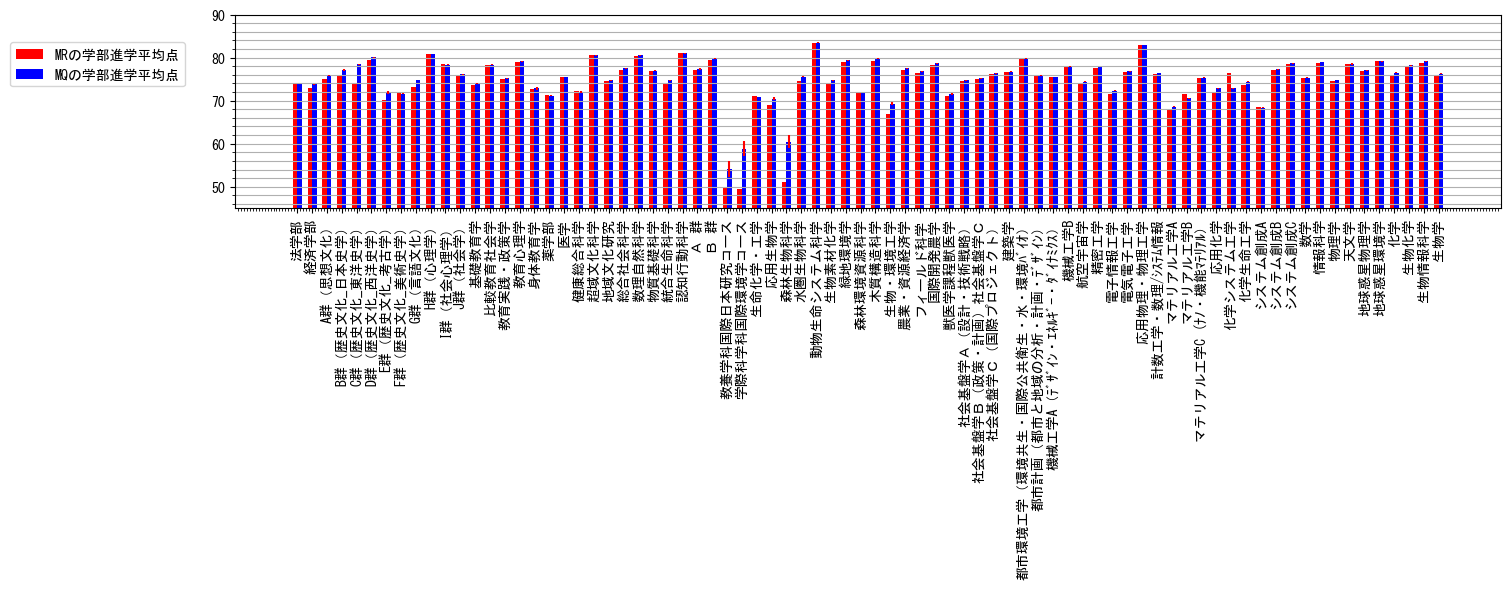

In [60]:
height1 = avg_MR.loc["1000回平均"]  # 点数1
height2 = avg_MQ.loc["1000回平均"]  # 点数2
 
left = np.arange(len(height1))  # numpyで横軸を設定
labels = fac
 
width = 0.3

fig=plt.figure(figsize=(15,6),layout="tight", dpi=100)
ax=fig.add_subplot(1,1,1)
ax.minorticks_on()
 
bar_MR=plt.bar(left, height1, color='r', width=width, align='center')
bar_MQ=plt.bar(left+width, height2, color='b', width=width, align='center')

for x, y, interval in zip(left+width, height2, interval_list_MQ):
    ax.errorbar(x, y, interval, ecolor="red")
# for i in range(len(std_error_list_MQ)):
#     error_tuple=std_error_list_MQ[i]
#     # print(error_tuple[0], sample_mean_list_MR[i], error_tuple[1])
#     # print(fac[i] ,error_tuple[0] > sample_mean_list_MQ[i], error_tuple[0], ">" ,sample_mean_list_MQ[i], sample_mean_list_MQ[i] > error_tuple[1], sample_mean_list_MQ[i], ">", error_tuple[1])
#     if (error_tuple[0] > sample_mean_list_MR[i]) or (sample_mean_list_MR[i] > error_tuple[1]):
#         print(fac[i])


plt.legend((bar_MR[0], bar_MQ[0]), ("MRの学部進学平均点", "MQの学部進学平均点"), loc="upper left", borderaxespad=2, bbox_to_anchor=(-0.2, 1))
 
plt.xticks(left + width/2, labels, rotation=90)
plt.grid(which="both", axis="y")
plt.ylim(45, 90)
plt.show()

fig.savefig("image/avg_score.png", facecolor="white")


In [64]:
avg_MR_not_zero=pd.read_csv("Result/新制度での生徒の進学平均点(内定なし除く).csv", header=0, index_col=0)
avg_MQ_not_zero=pd.read_csv("Result/旧制度での生徒の進学平均点(内定なし除く).csv", header=0, index_col=0)
print(avg_MQ_not_zero)

                  効用の平均値
法学部            74.072597
経済学部           73.756507
A群（思想文化）       75.846625
B群（歴史文化_日本史学）  77.095882
C群（歴史文化_東洋史学）  78.453392
...                  ...
地球惑星環境学        79.154045
化学             76.469520
生物化学           78.215585
生物情報科学         79.086085
生物学            76.291668

[78 rows x 1 columns]


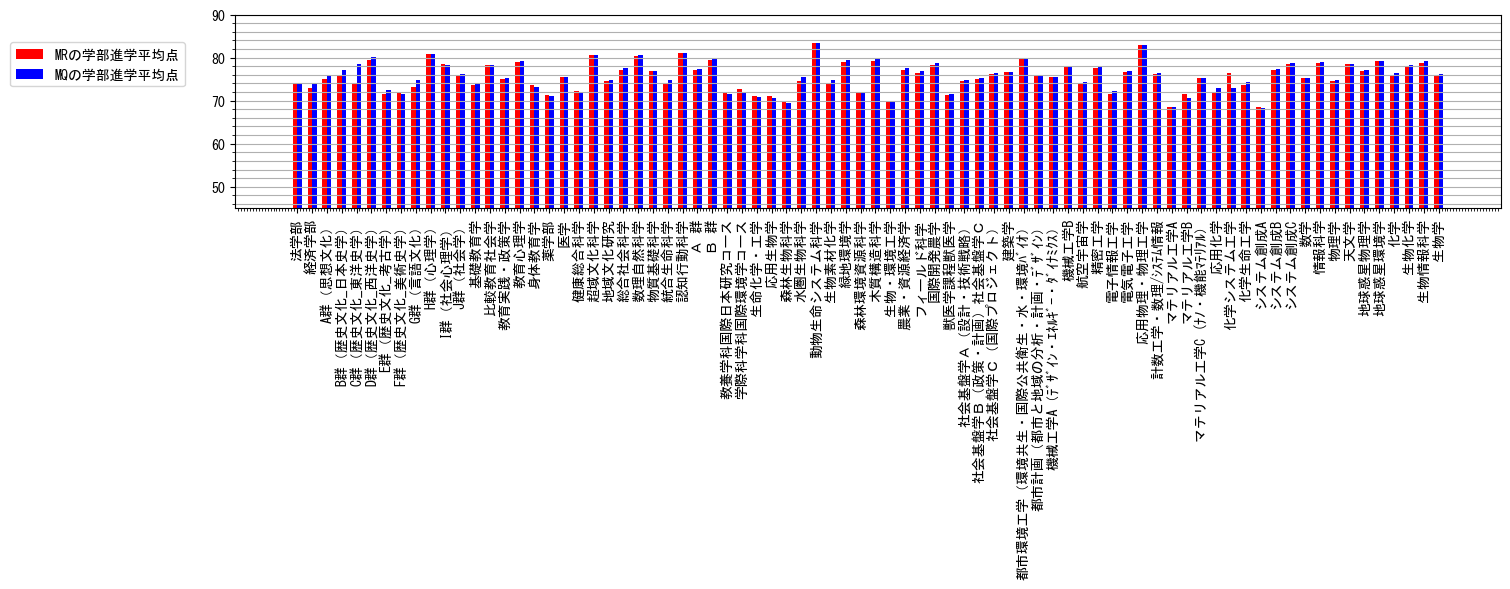

In [123]:
height1=avg_MR_not_zero["効用の平均値"]
height2=avg_MQ_not_zero["効用の平均値"]
left = np.arange(len(height1))  # numpyで横軸を設定
labels = fac
 
width = 0.3

fig=plt.figure(figsize=(15,6),layout="tight", dpi=100)
ax=fig.add_subplot(1,1,1)
ax.minorticks_on()
 
bar_MR=plt.bar(left, height1, color='r', width=width, align='center')
bar_MQ=plt.bar(left+width, height2, color='b', width=width, align='center')

# for x, y, interval in zip(left+width, height2, interval_list_MQ):
#     ax.errorbar(x, y, interval, ecolor="red")
# for i in range(len(std_error_list_MQ)):
#     error_tuple=std_error_list_MQ[i]
#     # print(error_tuple[0], sample_mean_list_MR[i], error_tuple[1])
#     # print(fac[i] ,error_tuple[0] > sample_mean_list_MQ[i], error_tuple[0], ">" ,sample_mean_list_MQ[i], sample_mean_list_MQ[i] > error_tuple[1], sample_mean_list_MQ[i], ">", error_tuple[1])
#     if (error_tuple[0] > sample_mean_list_MR[i]) or (sample_mean_list_MR[i] > error_tuple[1]):
#         print(fac[i])


plt.legend((bar_MR[0], bar_MQ[0]), ("MRの学部進学平均点", "MQの学部進学平均点"), loc="upper left", borderaxespad=2, bbox_to_anchor=(-0.2, 1))
 
plt.xticks(left + width/2, labels, rotation=90)
plt.grid(which="both", axis="y")
plt.ylim(45, 90)
plt.show()

fig.savefig("image/avg_score.png", facecolor="white",bbox_inches='tight', pad_inches=0)


In [9]:
total_MR=pd.read_csv("Result/新制度での学科の効用.csv", header=0, index_col=0)
total_MQ=pd.read_csv("Result/旧制度での学科の効用.csv", header=0, index_col=0)

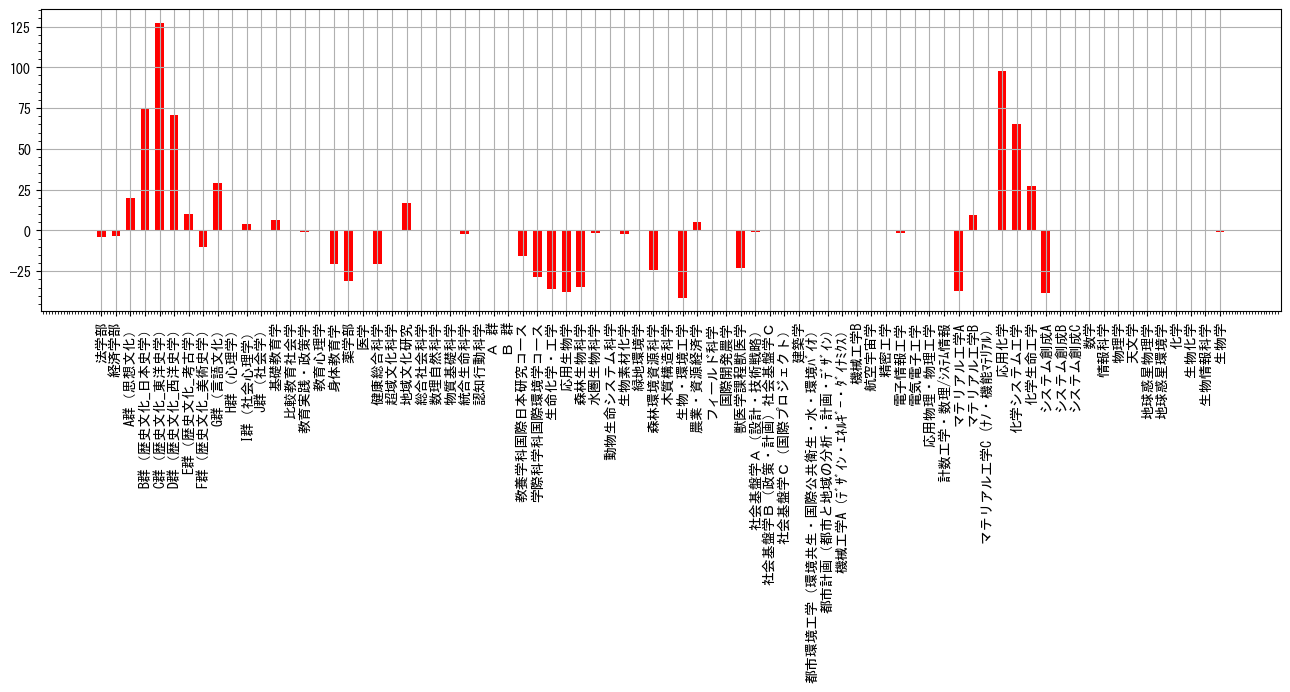

In [10]:
total_mean_MR=total_MR.loc["平均値"]
total_mean_MQ=total_MQ.loc["平均値"]
y_list=[]
for f in fac:
    y=(total_mean_MR[f]-total_mean_MQ[f])/total_mean_MQ[f]*100
    y_list.append(y)
x_list=np.arange(len(y_list))
x_list=x_list
width=0.6
width=width
fig=plt.figure(figsize=(16,4), dpi=100)
ax=fig.add_subplot(1,1,1)
ax.minorticks_on()
bar=plt.bar(x_list, y_list, width=width, color="r", align="center")
plt.xticks(x_list, fac, rotation=90)
plt.grid(True, which="major", axis="y")
plt.grid(True, which="major", axis="x")

plt.show()
fig.savefig("image/avg_utility.png", facecolor="white",bbox_inches='tight', pad_inches=0)

In [3]:
accept_MQ=pd.read_csv("Result/受入数MQ.csv", header=0, index_col=0).to_dict()
accept_MR=pd.read_csv("Result/受入数MR.csv", header=0, index_col=0).to_dict()

MQ_dict=dict()
MR_dict=dict()
for f in fac:
    MQ_dict[f]={"定員充足率":100*accept_MQ["受入数"][f]/M[f]["second"]}
    MR_dict[f]={"定員充足率":100*accept_MR["受入数"][f]/M[f]["second"]}

MQ_df=pd.DataFrame(MQ_dict).T
MR_df=pd.DataFrame(MR_dict).T
MQ_df.to_csv("Result/定員充足率_MQ.csv", encoding="utf-8-sig")
MR_df.to_csv("Result/定員充足率_MR.csv", encoding="utf-8-sig")

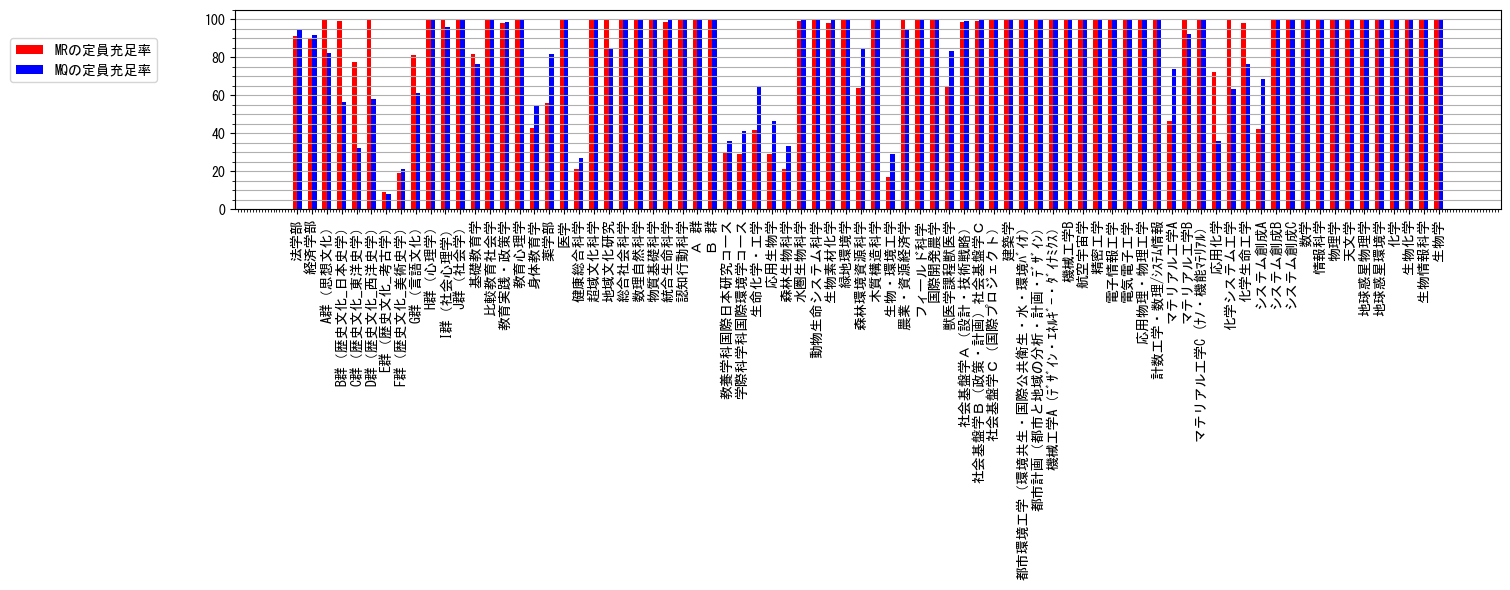

In [4]:
height1=MR_df["定員充足率"]
height2=MQ_df["定員充足率"]
left = np.arange(len(height1))  # numpyで横軸を設定
labels = fac
 
width = 0.3

fig=plt.figure(figsize=(15,6),layout="tight", dpi=100)
ax=fig.add_subplot(1,1,1)
ax.minorticks_on()
 
bar_MR=plt.bar(left, height1, color='r', width=width, align='center')
bar_MQ=plt.bar(left+width, height2, color='b', width=width, align='center')

# for x, y, interval in zip(left+width, height2, interval_list_MQ):
#     ax.errorbar(x, y, interval, ecolor="red")
# for i in range(len(std_error_list_MQ)):
#     error_tuple=std_error_list_MQ[i]
#     # print(error_tuple[0], sample_mean_list_MR[i], error_tuple[1])
#     # print(fac[i] ,error_tuple[0] > sample_mean_list_MQ[i], error_tuple[0], ">" ,sample_mean_list_MQ[i], sample_mean_list_MQ[i] > error_tuple[1], sample_mean_list_MQ[i], ">", error_tuple[1])
#     if (error_tuple[0] > sample_mean_list_MR[i]) or (sample_mean_list_MR[i] > error_tuple[1]):
#         print(fac[i])


plt.legend((bar_MR[0], bar_MQ[0]), ("MRの定員充足率", "MQの定員充足率"), loc="upper left", borderaxespad=2, bbox_to_anchor=(-0.2, 1))
 
plt.xticks(left + width/2, labels, rotation=90)
plt.grid(which="both", axis="y")
plt.show()

fig.savefig("image/fill_rate.png", facecolor="white",bbox_inches='tight', pad_inches=0)


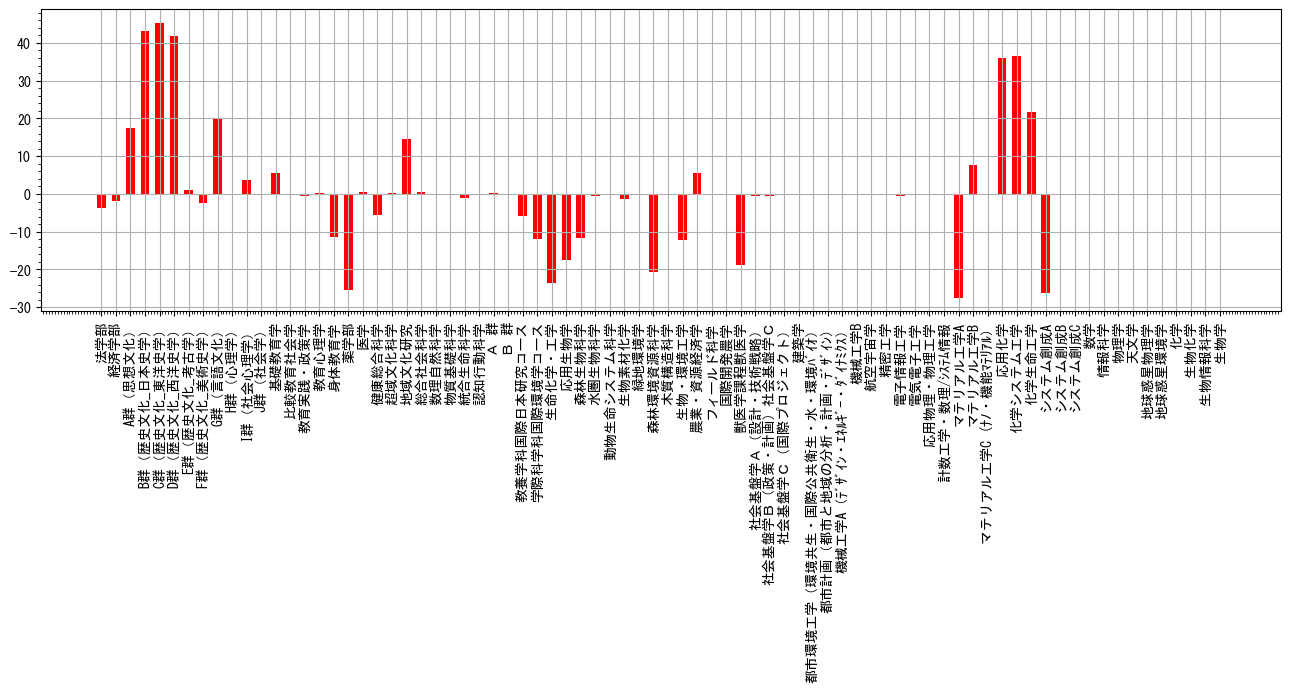

In [7]:
y_list2=[]
for f in fac:
    y=(MR_dict[f]["定員充足率"]-MQ_dict[f]["定員充足率"])
    y_list2.append(y)
x_list=np.arange(len(y_list2))
x_list=x_list
width=0.6
width=width
fig=plt.figure(figsize=(16,4), dpi=100)
ax=fig.add_subplot(1,1,1)
ax.minorticks_on()
bar=plt.bar(x_list, y_list2, width=width, color="r", align="center")
plt.xticks(x_list, fac, rotation=90)
plt.grid(True, which="major", axis="y")
plt.grid(True, which="major", axis="x")

plt.show()
fig.savefig("image/fill_rate_difference.png", facecolor="white",bbox_inches='tight', pad_inches=0)

                            OLS Regression Results                            
Dep. Variable:           学科の効用平均値の変化率   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     736.1
Date:                Sat, 31 Dec 2022   Prob (F-statistic):           7.69e-41
Time:                        18:37:02   Log-Likelihood:                -274.40
No. Observations:                  78   AIC:                             552.8
Df Residuals:                      76   BIC:                             557.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1575      0.938      0.168      0.8

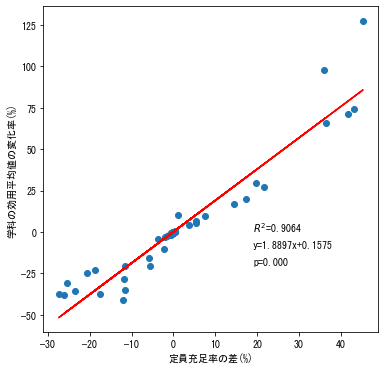

In [22]:
from sklearn.linear_model import LinearRegression

x=pd.DataFrame(y_list2, columns=["定員充足率の差"])
y=pd.DataFrame(y_list, columns=["学科の効用平均値の変化率"])

model_lr = LinearRegression()
model_lr.fit(x, y)
r2_lin=model_lr.score(x, y)

import statsmodels.api as sm

x_add_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_add_const).fit()
print(model_sm.summary())
_, pvalues=round(model_sm.pvalues, 4)
const,coef=round(model_sm.params,4)

fig=plt.figure(figsize=(6,6))
plt.xlabel("定員充足率の差(%)")
plt.ylabel("学科の効用平均値の変化率(%)")

plt.scatter(y_list2, y_list)
# for i, label in enumerate(fac):
#     plt.text(y_list2[i], y_list[i], label)
plt.plot(x, model_lr.predict(x), linestyle="solid", color="red")
plt.text(19.0, 0.0, '$ R^{2} $=' + str(round(r2_lin, 4)))
plt.text(19.0, -10, f"y={coef}x+{const}")
plt.text(19.0, -20, f"p=0.000")
plt.show()
fig.savefig("image/regression.png", facecolor="white")

In [28]:
pm=pd.read_csv("新制度移行による効用増減.csv", header=0, index_col=0)
pm["指定科類枠の効果"]=pm["指定科類枠の効用増"]-pm["指定科類枠の効用減"]
pm["全科類枠の効果"]=pm["全科類枠の効用増"]-pm["全科類枠の効用減"]
pm=pm.reindex(["指定科類枠の効用増", "指定科類枠の効用減", "指定科類枠の効果", "全科類枠の効用増", "全科類枠の効用減", "全科類枠の効果"], axis="columns")
print(pm)
pm.to_csv("Result/枠別制度移行効果.csv", encoding="utf-8-sig")

                指定科類枠の効用増    指定科類枠の効用減     指定科類枠の効果     全科類枠の効用増    全科類枠の効用減  \
法学部             44.023621   298.064221  -254.040599   222.257085  320.772185   
経済学部            45.725636  1275.598232 -1229.872596  1267.407473  269.425333   
A群（思想文化）         1.117961    31.333061   -30.215100   395.981073  105.298973   
B群（歴史文化_日本史学）    0.000000    13.379779   -13.379779   390.005786   22.686879   
C群（歴史文化_東洋史学）    0.000000     2.878316    -2.878316   650.835909   36.952725   
...                   ...          ...          ...          ...         ...   
地球惑星環境学          3.361277     3.428616    -0.067339     8.374911    8.509972   
化学             110.633488   116.365813    -5.732325     0.000000    0.000000   
生物化学            75.421205    78.407763    -2.986558     0.000000    0.000000   
生物情報科学          38.597836    39.842219    -1.244383     0.000000    0.000000   
生物学              0.000000     0.000000     0.000000    95.657571  101.527532   

                  全科類枠の効果  
法学部        

['法学部', 'A群（思想文化）', 'B群（歴史文化_日本史学）', 'D群（歴史文化_西洋史学）', 'E群（歴史文化_考古学）', 'F群（歴史文化_美術史学）', 'H群（心理学）', 'I群（社会心理学）', 'J群（社会学）', '基礎教育学', '比較教育社会学', '教育実践・政策学', '教育心理学', '身体教育学', '医学', '健康総合科学', '超域文化科学', '地域文化研究', '総合社会科学', '数理自然科学', '物質基礎科学', '統合生命科学', '認知行動科学', 'Ａ 群', 'Ｂ 群', '教養学科国際日本研究コース', '学際科学科国際環境学コース', '応用生物学', '森林生物科学', '水圏生物科学', '動物生命システム科学', '生物素材化学', '緑地環境学', '森林環境資源科学', '木質構造科学', '生物・環境工学', '農業・資源経済学', 'フィールド科学', '国際開発農学', '獣医学課程獣医学', '社会基盤学Ａ（設計・技術戦略）', '社会基盤学Ｂ（政策・計画）社会基盤学Ｃ', '社会基盤学Ｃ（国際プロジェクト）', '建築学', '都市環境工学（環境共生・国際公共衛生・水・環境ﾊﾞｲｵ）', '都市計画（都市と地域の分析・計画・ﾃﾞｻﾞｲﾝ）', '機械工学A（ﾃﾞｻﾞｲﾝ・ｴﾈﾙｷﾞｰ・ﾀﾞｲﾅﾐｸｽ）', '機械工学B', '航空宇宙学', '精密工学', '電子情報工学', '電気電子工学', '応用物理・物理工学', '計数工学・数理/ｼｽﾃﾑ情報', 'マテリアル工学A', 'マテリアル工学B', 'マテリアル工学C (ﾅﾉ・機能ﾏﾃﾘｱﾙ）', '化学生命工学', 'システム創成A', 'システム創成B', 'システム創成C', '数学', '情報科学', '物理学', '天文学', '地球惑星物理学', '地球惑星環境学', '化学', '生物化学', '生物情報科学', '生物学']


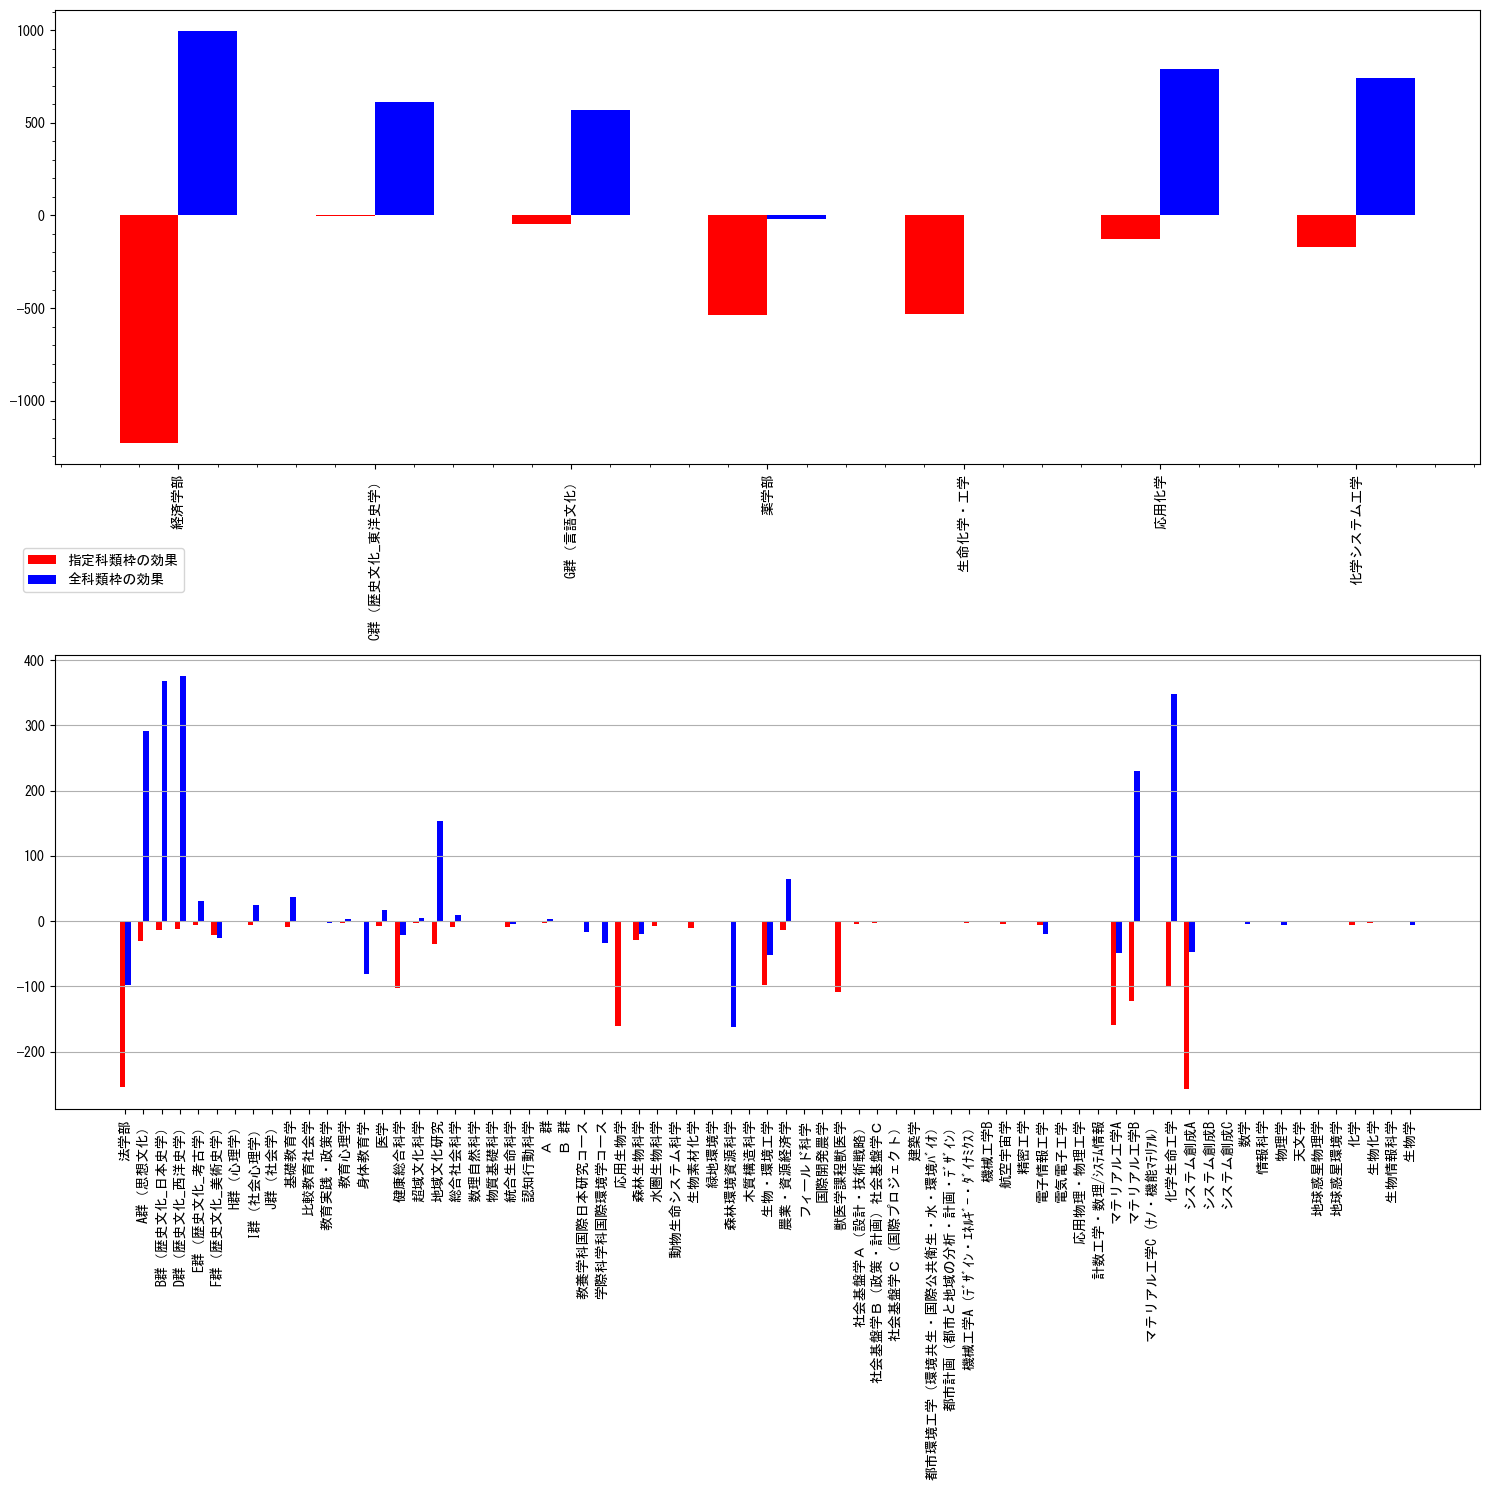

In [61]:
height1=pm["指定科類枠の効果"]
height2=pm["全科類枠の効果"]
above_500=[]
for f in fac:
    if abs(height1[f])>500 or abs(height2[f])>500:
        above_500.append(f)
under_500=fac[:]
for f in above_500:
    under_500.remove(f)
print(under_500)

height1_u500=dict()
height2_u500=dict()
for f in under_500:
    height1_u500[f]=(height1[f])
    height2_u500[f]=(height2[f])

height1_a500=dict()
height2_a500=dict()
for f in above_500:
    height1_a500[f]=(height1[f])
    height2_a500[f]=(height2[f])

width = 0.3

fig=plt.figure(figsize=(15,15),layout="tight", dpi=100)
ax=fig.add_subplot(2,1,1)
ax.minorticks_on()

left=np.arange(len(above_500))
bar_MR=ax.bar(left, height1_a500.values(), color='r', width=width, align='center')
bar_MQ=ax.bar(left+width, height2_a500.values(), color='b', width=width, align='center')
fig.legend((bar_MR[0], bar_MQ[0]), ("指定科類枠の効果", "全科類枠の効果"), loc="upper left", borderaxespad=2, bbox_to_anchor=(0, 0.65))
ax.set_xticks(left + width/2, height1_a500.keys(), rotation=90)


ax2=fig.add_subplot(2,1,2)
ax2.minorticks_on

left=np.arange(len(under_500))
bar_MR=ax2.bar(left, height1_u500.values(), color='r', width=width, align='center')
bar_MQ=ax2.bar(left+width, height2_u500.values(), color='b', width=width, align='center')

ax2.set_xticks(left + width/2, height1_u500.keys(), rotation=90)
plt.grid(which="both", axis="y")
plt.show()

fig.savefig("image/effect_in_quota_above_500.png", facecolor="white",bbox_inches='tight', pad_inches=0)